In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning utilities
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [ ]:
   from google.colab import files
   uploaded = files.upload()


Saving telecom_customer_churn.csv to telecom_customer_churn.csv


In [ ]:
df = pd.read_csv("telecom_customer_churn.csv")

In [ ]:
df.head()

,Customer ID,Gender,Age,Married,Number of Dependents,City,Zip Code,Latitude,Longitude,Number of Referrals,...,Payment Method,Monthly Charge,Total Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Total Revenue,Customer Status,Churn Category,Churn Reason
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,34.827662,-118.999073,2,...,Credit Card,65.6,593.30,0.00,0,381.51,974.81,Stayed,NaN,NaN
1,0003-MKNFE,Male,46,No,0,Glendale,91206,34.162515,-118.203869,0,...,Credit Card,-4.0,542.40,38.33,10,96.21,610.28,Stayed,NaN,NaN
2,0004-TLHLJ,Male,50,No,0,Costa Mesa,92627,33.645672,-117.922613,0,...,Bank Withdrawal,73.9,280.85,0.00,0,134.60,415.45,Churned,Competitor,Competitor had better devices
3,0011-IGKFF,Male,78,Yes,0,Martinez,94553,38.014457,-122.115432,1,...,Bank Withdrawal,98.0,1237.85,0.00,0,361.66,1599.51,Churned,Dissatisfaction,Product dissatisfaction
4,0013-EXCHZ,Female,75,Yes,0,Camarillo,93010,34.227846,-119.079903,3,...,Credit Card,83.9,267.40,0.00,0,22.14,289.54,Churned,Dissatisfaction,Network reliability


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Gender                             7043 non-null   object 
 2   Age                                7043 non-null   int64  
 3   Married                            7043 non-null   object 
 4   Number of Dependents               7043 non-null   int64  
 5   City                               7043 non-null   object 
 6   Zip Code                           7043 non-null   int64  
 7   Latitude                           7043 non-null   float64
 8   Longitude                          7043 non-null   float64
 9   Number of Referrals                7043 non-null   int64  
 10  Tenure in Months                   7043 non-null   int64  
 11  Offer                              3166 non-null   objec

In [ ]:
df.isnull().sum()

,0
Customer ID,0
Gender,0
Age,0
Married,0
Number of Dependents,0
City,0
Zip Code,0
Latitude,0
Longitude,0
Number of Referrals,0


In [12]:
df.drop(columns=["customerID"], inplace=True, errors='ignore')

In [10]:
   label_encoder = LabelEncoder()
   for column in df.select_dtypes(include=["object"]).columns:
       df[column] = label_encoder.fit_transform(df[column])


In [11]:
   # Create target label based on 'Customer Status'
df['Churn'] = df['Customer Status'].apply(lambda x: 1 if x == 2 else 0)

In [13]:
# Create a binary target variable based on 'Customer Status' or 'Churn Category'

# For example, if 'Customer Status' is 'Active' or 'Churned':
df['Churn'] = df['Customer Status'].apply(lambda x: 1 if x == 'Churned' else 0)

In [14]:
# Create target label based on 'Customer Status'
df['Churn'] = df['Customer Status'].apply(lambda x: 1 if x == 2 else 0)


In [15]:
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]                # Target (1 = churn, 0 = not churn)

In [16]:
# Assuming 'Churn' column has already been created
X = df.drop(columns=["Churn"], errors='ignore')  # Drop 'Churn' to get features
y = df["Churn"]  # Target variable

In [17]:
   scaler = StandardScaler()
   X_scaled = scaler.fit_transform(X)



In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [23]:
# Fill missing values with the mean for numerical columns
df.fillna(df.mean(), inplace=True)



In [24]:
# Drop rows with any missing values
df.dropna(inplace=True)


In [25]:
# Fill missing values with the mean for numerical columns
df.fillna(df.mean(), inplace=True)


In [26]:
# Fill missing values with the mode for categorical columns
for column in df.select_dtypes(include=["object"]).columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [27]:
# Check for missing values again
print(df.isnull().sum().sum())  # Should be 0 if all missing values are handled

0


In [28]:
# Split the dataset into features and target again if necessary
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target

# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create and fit the model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [29]:
# Check for missing values in the dataset
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


Series([], dtype: int64)


In [30]:
# Check the data types of the DataFrame
print(df.dtypes)


Customer ID                            int64
Gender                                 int64
Age                                    int64
Married                                int64
Number of Dependents                   int64
City                                   int64
Zip Code                               int64
Latitude                             float64
Longitude                            float64
Number of Referrals                    int64
Tenure in Months                       int64
Offer                                  int64
Phone Service                          int64
Avg Monthly Long Distance Charges    float64
Multiple Lines                         int64
Internet Service                       int64
Internet Type                          int64
Avg Monthly GB Download              float64
Online Security                        int64
Online Backup                          int64
Device Protection Plan                 int64
Premium Tech Support                   int64
Streaming 

In [31]:
# Define features and target
X = df.drop(columns=["Churn"])  # Features
y = df["Churn"]  # Target

# Print the shapes of X and y
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)


Shape of X (features): (7043, 38)
Shape of y (target): (7043,)


In [32]:
# Normalize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the mean and standard deviation of the scaled features
print("Mean of scaled features:", np.mean(X_scaled, axis=0))
print("Standard deviation of scaled features:", np.std(X_scaled, axis=0))


Mean of scaled features: [ 0.00000000e+00 -2.32038661e-17  4.28767092e-18  1.23081377e-16
  1.00886375e-18  1.21063649e-17 -2.49189345e-16  2.20033183e-15
  6.34575296e-15  3.02659124e-18 -1.27116832e-16 -1.31152287e-16
  7.26381897e-17  1.79577747e-16 -5.44786422e-17  8.37356909e-17
  1.00886375e-16 -5.04431873e-17  7.94480199e-17  8.17179634e-17
  7.26381897e-17 -6.55761434e-17 -1.31152287e-17 -6.15406885e-17
  7.16293259e-17 -3.83368223e-17 -7.26381897e-17 -6.05318247e-17
 -5.04431873e-18 -9.07977371e-18  6.05318247e-18 -1.91684112e-17
 -1.71506837e-17  1.36196606e-16 -1.27116832e-16 -5.24609148e-17
 -2.68357756e-16  2.56251391e-16]
Standard deviation of scaled features: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [33]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (5634, 38)
Shape of X_test: (1409, 38)
Shape of y_train: (5634,)
Shape of y_test: (1409,)


In [34]:
y_pred = model.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

Model Accuracy: 1.0000


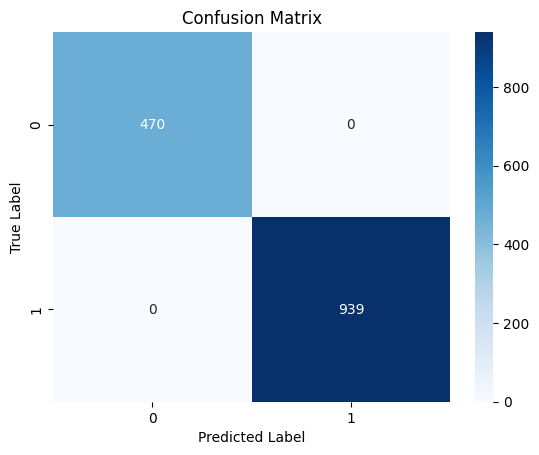

In [36]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       470
           1       1.00      1.00      1.00       939

    accuracy                           1.00      1409
   macro avg       1.00      1.00      1.00      1409
weighted avg       1.00      1.00      1.00      1409

